1. Install Dependencies and Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

#data_set_from: https://www.kaggle.com/datasets/muthuj7/weather-dataset/ -> History

2. Importing the Data

In [2]:
df = pd.read_csv('weatherHistory.csv', index_col=False)
df = df.copy()
#df.sort_values(by=['Formatted Date'])
df.sort_values(by='Formatted Date', ascending = True, inplace = True) 
df = df.reset_index(drop=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
5,2006-01-01 05:00:00,Mostly Cloudy,rain,1.205556,-3.072222,0.85,15.9068,149.0,9.9820,0.0,1014.08,Mostly cloudy throughout the day.
6,2006-01-01 06:00:00,Mostly Cloudy,rain,2.222222,-2.494444,0.79,20.5597,140.0,10.0464,0.0,1013.93,Mostly cloudy throughout the day.
7,2006-01-01 07:00:00,Mostly Cloudy,rain,2.072222,-3.272222,0.81,25.4219,136.0,10.0303,0.0,1013.24,Mostly cloudy throughout the day.
8,2006-01-01 08:00:00,Mostly Cloudy,rain,2.200000,-2.850000,0.80,23.1679,140.0,11.2056,0.0,1013.19,Mostly cloudy throughout the day.
9,2006-01-01 09:00:00,Mostly Cloudy,rain,2.733333,-2.133333,0.82,22.8781,140.0,9.9820,0.0,1013.29,Mostly cloudy throughout the day.


3. Preprocessing the Data

In [3]:
weather = df.loc[:, ['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)']]
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'])
weather.sort_values(by=['Formatted Date'])
weather[:1000]

type(weather['Formatted Date'])

pandas.core.series.Series

In [4]:
weather = weather.dropna(axis=0)
weather.head()

,Formatted Date,Temperature (C),Apparent Temperature (C)
0,2006-01-01 00:00:00,0.577778,-4.050000
1,2006-01-01 01:00:00,1.161111,-3.238889
2,2006-01-01 02:00:00,1.666667,-3.155556
3,2006-01-01 03:00:00,1.711111,-2.194444
4,2006-01-01 04:00:00,1.183333,-2.744444


In [5]:
weather.isnull().sum()

Formatted Date              0
Temperature (C)             0
Apparent Temperature (C)    0
dtype: int64

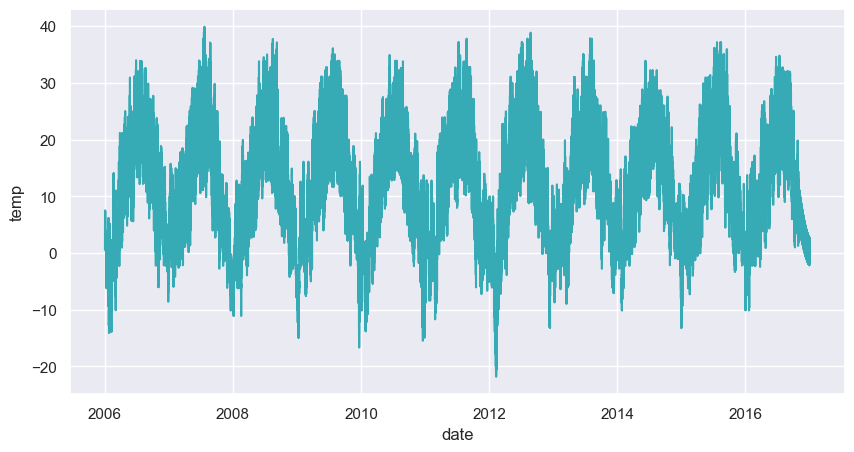

In [6]:
sns.set_theme()
color_pal = sns.color_palette('husl',9)
plt.figure(figsize=(10,5))
plt.plot(weather['Formatted Date'], weather['Temperature (C)'], '-',color=color_pal[5])
plt.xlabel('date')
plt.ylabel('temp')
plt.show()

4. Train/test data split

In [10]:
weather_len = len(weather)
weather_len

96453

In [11]:
split_date = weather[weather['Formatted Date']=='2014-01-01'].index.values
split_date_rate = split_date/weather_len
split_date_rate = split_date_rate[0]
split_date_rate

0.7273179683369102

In [12]:
weather_train = weather.loc[weather.index <= weather_len*split_date_rate].copy()
weather_test = weather.loc[weather.index > weather_len*split_date_rate].copy()

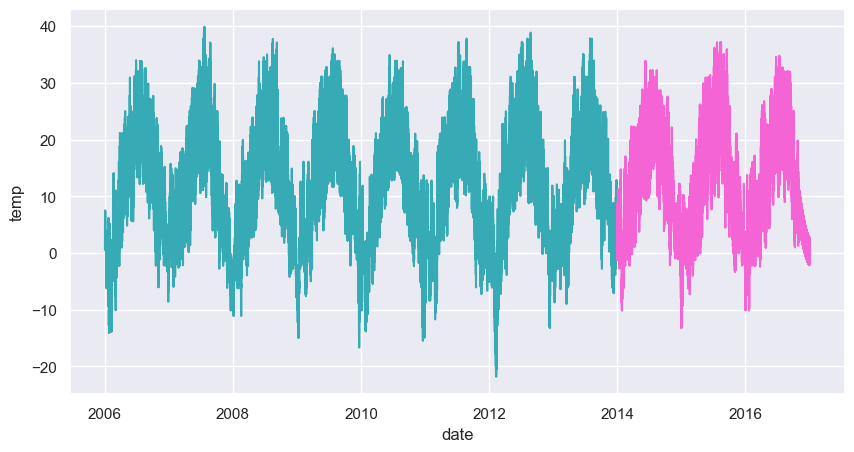

In [13]:
color_pal = sns.color_palette('husl',9)
plt.figure(figsize=(10,5))
plt.plot(weather_train['Formatted Date'], weather_train['Temperature (C)'], '-',color=color_pal[5])
plt.plot(weather_test['Formatted Date'], weather_test['Temperature (C)'], '-',color=color_pal[8])
plt.xlabel('date')
plt.ylabel('temp')
plt.show()

5. Prophet is a forecasting tool developed by Facebook for time series data analysis, particularly for data with seasonal trends. It is a high-level tool designed to facilitate the quick and easy creation of forecasting models without requiring in-depth knowledge of statistics or machine learning. Prophet automatically detects seasonality, trends, and outliers in the data, making it a popular tool in business and academic research for generating accurate time series forecasts.

In [ ]:
from prophet import Prophet

In [14]:
weather_train_prophet = weather_train.reset_index().rename(columns={'Formatted Date':'ds', 'Temperature (C)':'y'})

In [15]:
%%time
model = Prophet()
model.fit(weather_train_prophet)

16:54:17 - cmdstanpy - INFO - Chain [1] start processing
16:54:45 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 5.58 s
Wall time: 34.9 s


In [16]:
# Predict on test set with model
weather_test_prophet = weather_test.reset_index().rename(columns={'Formatted Date':'ds','Temperature (C)':'y'})

weather_test_temp = model.predict(weather_test_prophet)

In [17]:
weather_test_temp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01 01:00:00,-3.289962,-8.730006,1.884554
1,2014-01-01 02:00:00,-3.657204,-8.783640,1.686495
2,2014-01-01 03:00:00,-4.057232,-9.237685,1.756410
3,2014-01-01 04:00:00,-4.429865,-10.073552,1.122099
4,2014-01-01 05:00:00,-4.594482,-9.978757,1.079599
...,...,...,...,...
26295,2016-12-31 19:00:00,-0.783494,-25.426586,25.475150
26296,2016-12-31 20:00:00,-1.924474,-27.422453,24.917557
26297,2016-12-31 21:00:00,-2.887664,-27.896175,23.551113
26298,2016-12-31 22:00:00,-3.637251,-27.591515,23.167046


In [18]:
weather_test_temp.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 01:00:00,11.715686,-8.730006,1.884554,11.715686,11.715686,-15.005649,-15.005649,-15.005649,-2.812574,...,-0.147513,-0.147513,-0.147513,-12.045562,-12.045562,-12.045562,0.0,0.0,0.0,-3.289962
1,2014-01-01 02:00:00,11.715617,-8.783640,1.686495,11.715617,11.715617,-15.372821,-15.372821,-15.372821,-3.189466,...,-0.142711,-0.142711,-0.142711,-12.040643,-12.040643,-12.040643,0.0,0.0,0.0,-3.657204
2,2014-01-01 03:00:00,11.715547,-9.237685,1.756410,11.715547,11.715547,-15.772779,-15.772779,-15.772779,-3.600015,...,-0.137073,-0.137073,-0.137073,-12.035691,-12.035691,-12.035691,0.0,0.0,0.0,-4.057232
3,2014-01-01 04:00:00,11.715478,-10.073552,1.122099,11.715478,11.715478,-16.145343,-16.145343,-16.145343,-3.983980,...,-0.130655,-0.130655,-0.130655,-12.030708,-12.030708,-12.030708,0.0,0.0,0.0,-4.429865
4,2014-01-01 05:00:00,11.715409,-9.978757,1.079599,11.715409,11.715409,-16.309891,-16.309891,-16.309891,-4.160672,...,-0.123526,-0.123526,-0.123526,-12.025692,-12.025692,-12.025692,0.0,0.0,0.0,-4.594482


C:\Users\giedr\Desktop\programowanie\DS\Weather\weather\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\giedr\Desktop\programowanie\DS\Weather\weather\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


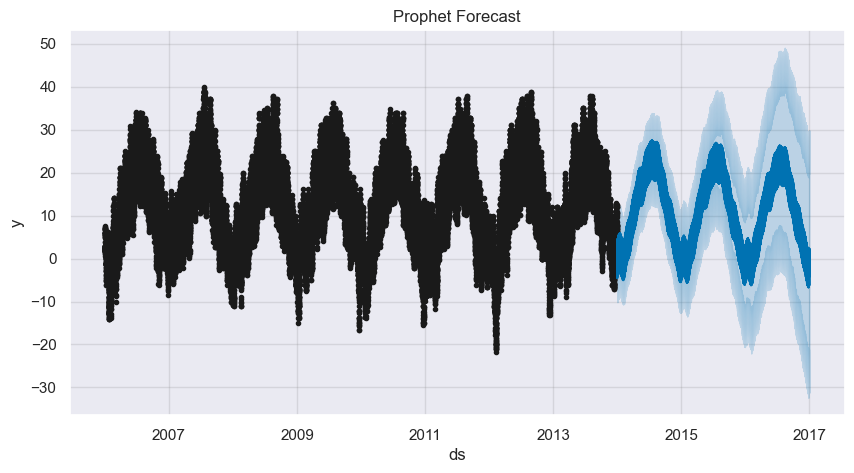

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(weather_test_temp, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

C:\Users\giedr\Desktop\programowanie\DS\Weather\weather\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\giedr\Desktop\programowanie\DS\Weather\weather\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\giedr\Desktop\programowanie\DS\Weather\weather\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

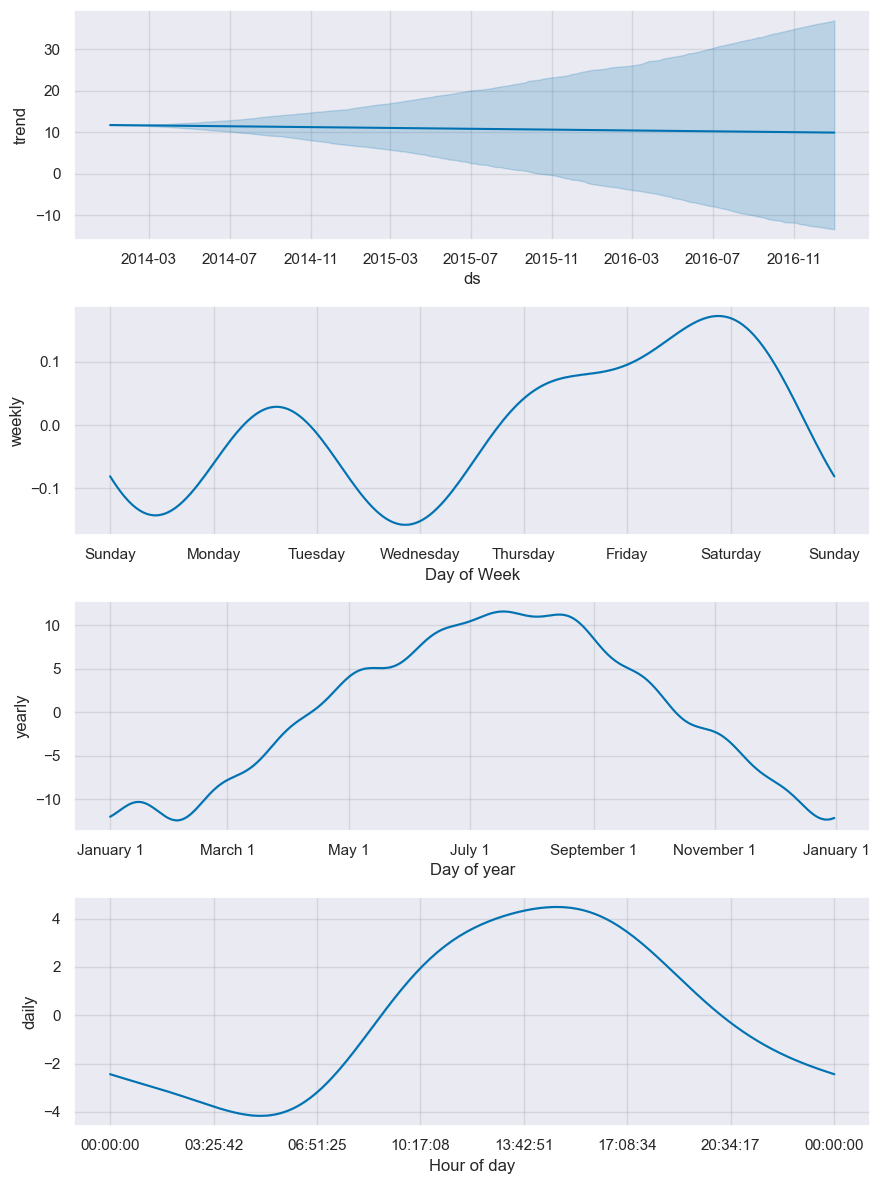

In [20]:
fig = model.plot_components(weather_test_temp)
plt.show()

5. Compare forecast to actual values
    - With this model used, a range of values was predicted, not a specific value

In [21]:
actual = weather_test.set_index('Formatted Date').drop( columns='Apparent Temperature (C)')
actual = actual[26000:]
actual.head()

,Temperature (C)
Formatted Date,
2016-12-19 12:00:00,3.083333
2016-12-19 13:00:00,3.488889
2016-12-19 14:00:00,3.588889
2016-12-19 15:00:00,3.388889
2016-12-19 16:00:00,2.955556


In [22]:
predict = weather_test_temp[['ds','yhat_lower','yhat' ,'yhat_upper']].set_index('ds')
predict = predict[26000:]
predict.head()

,yhat_lower,yhat,yhat_upper
ds,,,
2016-12-19 12:00:00,-21.788778,1.887307,28.856544
2016-12-19 13:00:00,-22.450703,2.393849,29.357459
2016-12-19 14:00:00,-22.219682,2.694026,28.538069
2016-12-19 15:00:00,-20.821286,2.767233,29.456301
2016-12-19 16:00:00,-21.535418,2.507889,28.431067


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Temperature')]

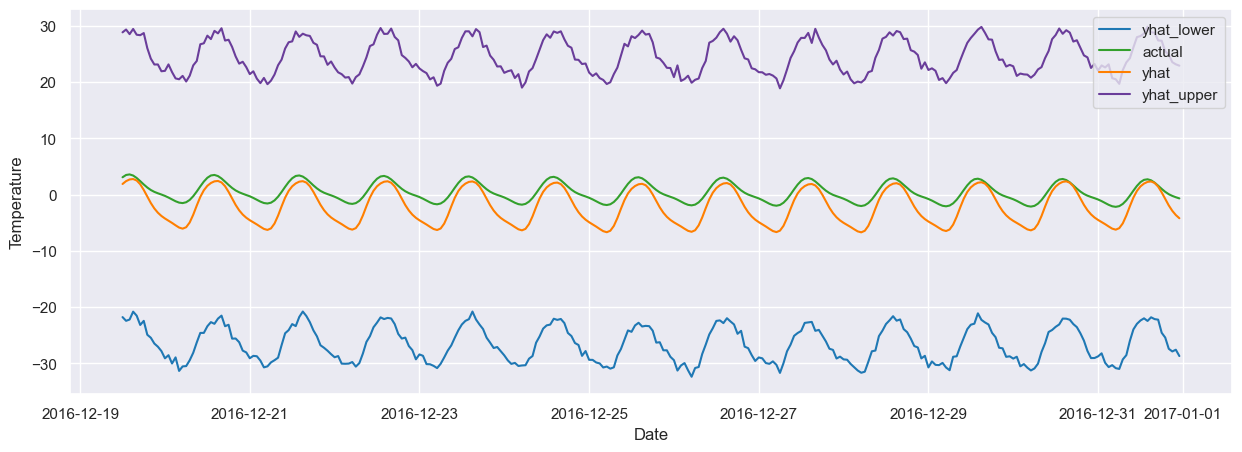

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
color_pal = sns.color_palette('Paired',11)
sns.lineplot(data=predict , x="ds", y="yhat_lower", ax=ax, color=color_pal[1], label='yhat_lower')
sns.lineplot(data=actual , x="Formatted Date", y="Temperature (C)", ax=ax, color=color_pal[3], label='actual')
sns.lineplot(data=predict , x="ds", y="yhat", ax=ax, color=color_pal[7], label='yhat')
sns.lineplot(data=predict , x="ds", y="yhat_upper", ax=ax, color=color_pal[9], label='yhat_upper')
ax.set(xlabel='Date', ylabel='Temperature')

6. Error Metrics:
- Mean Squared Error (MSE): measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better accuracy, as they reflect smaller deviations between predicted and actual values.
- Mean Absolute Error (MAE): represents the average of the absolute differences between predicted and actual values. Similar to MAPE, lower MAE values indicate better accuracy, as they reflect smaller deviations between predicted and actual values.

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
np.sqrt(mean_squared_error(y_true=weather_test['Temperature (C)'],y_pred=weather_test_temp['yhat']))

4.238376461175545

In [37]:
mean_absolute_error(y_true=weather_test['Temperature (C)'], y_pred=weather_test_temp['yhat'])

3.3741446601736946

7. Predictions

In [38]:
future_1 = model.make_future_dataframe(periods=365, include_history=False)
forecast_1 = model.predict(future_1)

In [39]:
forecast_1[['ds','yhat']].set_index('ds')

,yhat
ds,
2014-01-02,-2.606117
2014-01-03,-2.413189
2014-01-04,-2.188781
2014-01-05,-2.279569
2014-01-06,-2.096829
...,...
2014-12-28,-3.748478
2014-12-29,-3.701002
2014-12-30,-3.600472


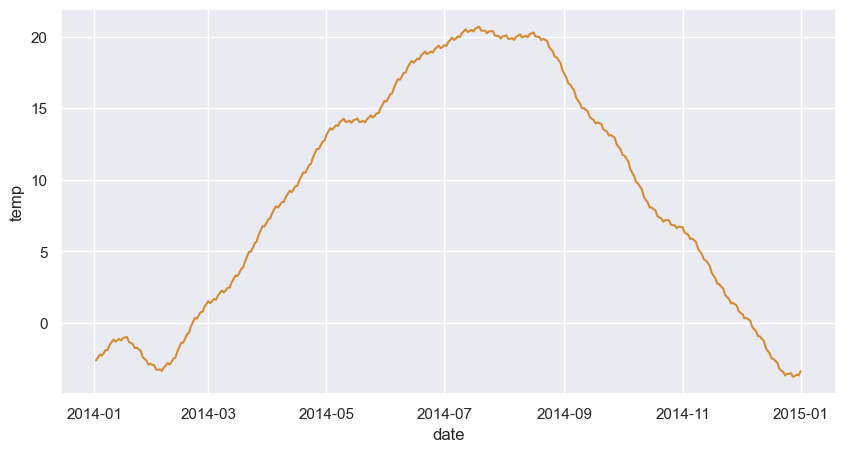

In [40]:
color_pal = sns.color_palette('husl',9)
plt.figure(figsize=(10,5))

plt.plot(forecast_1['ds'], forecast_1['yhat'], color=color_pal[1])

plt.xlabel('date')
plt.ylabel('temp')
plt.show()

In [41]:
future_2 = model.make_future_dataframe(periods=1098, include_history=False)
forecast_2 = model.predict(future_2)

In [42]:
forecast_2[['ds','yhat']].set_index('ds')

,yhat
ds,
2014-01-02,-2.606117
2014-01-03,-2.413189
2014-01-04,-2.188781
2014-01-05,-2.279569
2014-01-06,-2.096829
...,...
2016-12-30,-4.671834
2016-12-31,-4.509255
2017-01-01,-4.648648


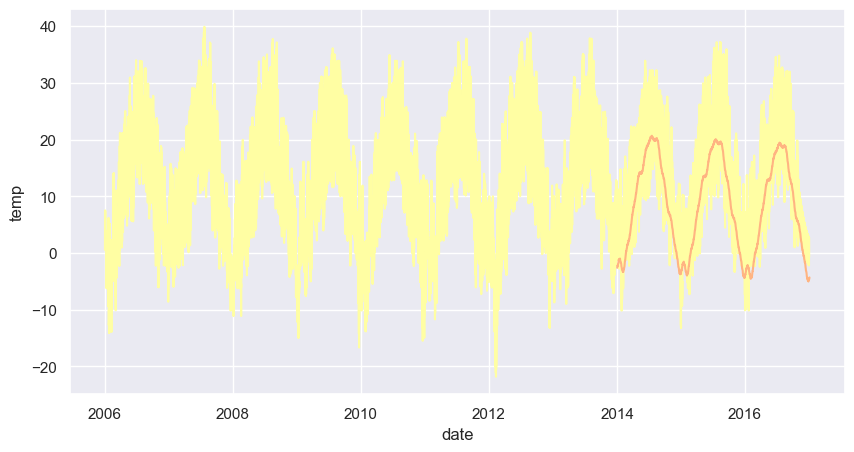

In [43]:
color_pal = sns.color_palette("pastel")
plt.figure(figsize=(10,5))

plt.plot(weather['Formatted Date'], weather['Temperature (C)'], color=color_pal[8])
plt.plot(forecast_2['ds'], forecast_2['yhat'], color=color_pal[1])


plt.xlabel('date')
plt.ylabel('temp')
plt.show()